## 6.2 순환 신경망 이해하기

### 코드 6-19 의사코드로 표현한 RNN

state_t = 0 <br>
for input_t in input_sequence: <br>
&nbsp;&nbsp;output_f = f(input_t, state_t) <br>
&nbsp;&nbsp;state_t = output_t <br>

### 코드 6-20 좀 더 자세한 의사코드로 표현한 RNN

state_t = 0<br>
for input_t in input_sequence:<br>
&nbsp;&nbsp;&nbsp;output_t = activation(dot(W, input_t) + dot(U, state_t) + b)<br>
&nbsp;&nbsp;&nbsp;state_t = output_t<br>

### 코드 6-21 넘파이로 구현한 간단한 RNN

In [13]:
import numpy as np

timesteps = 100 # 입력 시퀀스에 있는 타임스텝의 수
input_features = 32 # 입력 피처의 차원
output_features = 64 # 출력 피처의 차원

inputs = np.random.random((timesteps, input_features)) # 예제를 위해 생성한 난수

state_t = np.zeros((output_features,)) # 초기 상태: 모두 0인 벡터

W = np.random.random((output_features, input_features))
U = np.random.random((output_featurqes, output_features))
b = np.random.random((output_features,))

successive_outputs = list()
for input_t in inputs:
    output_t  = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    
    state_t = output_t
    
final_output_sequence = np.stack(successive_outputs, aixs=0)


NameError: name 'output_featurqes' is not defined

### 6.2.1 케라스의 순환 층

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [17]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [18]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


IMDB 영화 리뷰 분류 문제 적용

In [31]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 500
btach_size = 32

print ('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')
print ('시퀀스 패딩 (samples x time)')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기 : ', input_train.shape)
print('input_test 크기 : ', input_test.shape)

데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기 :  (25000, 500)
input_test 크기 :  (25000, 500)


### 코드 6-23 Embedding 층과 SimpleRNN 층을 사용한 모델 훈련

In [34]:
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 27s 175ms/step - loss: 0.5572 - acc: 0.7110 - val_loss: 0.4079 - val_acc: 0.8274
Epoch 2/10
157/157 [==============================] - 28s 179ms/step - loss: 0.3584 - acc: 0.8529 - val_loss: 0.3507 - val_acc: 0.8622
Epoch 3/10
157/157 [==============================] - 27s 173ms/step - loss: 0.2938 - acc: 0.8844 - val_loss: 0.4089 - val_acc: 0.8150
Epoch 4/10
157/157 [==============================] - 29s 183ms/step - loss: 0.2407 - acc: 0.9089 - val_loss: 0.4200 - val_acc: 0.8322
Epoch 5/10
157/157 [==============================] - 29s 184ms/step - loss: 0.1891 - acc: 0.9298 - val_loss: 0.3781 - val_acc: 0.8450
Epoch 6/10
157/157 [==============================] - 28s 179ms/step - loss: 0.1509 - acc: 0.9466 - val_loss: 0.3775 - val_acc: 0.8676
Epoch 7/10
157/157 [==============================] - 27s 174ms/step - loss: 0.1113 - acc: 0.9633 - val_loss: 0.6444 - val_acc: 0.7350
Epoch 8/10
157/157 [==============================] - 2

### 코드 6-24 결과 그래프 그리기

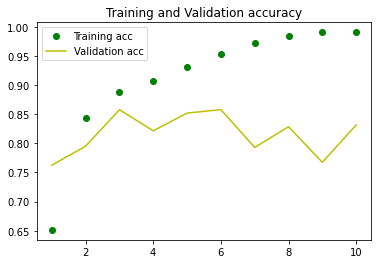

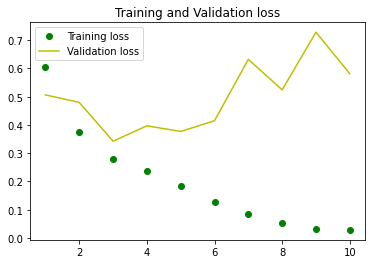

In [27]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'y', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

### 코드 6-27 케라스에서 LSTM 층 사용

In [32]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 4s 23ms/step - loss: 0.5176 - acc: 0.7620 - val_loss: 0.4471 - val_acc: 0.7936
Epoch 2/10
157/157 [==============================] - 3s 20ms/step - loss: 0.2990 - acc: 0.8849 - val_loss: 0.3689 - val_acc: 0.8414
Epoch 3/10
157/157 [==============================] - 3s 20ms/step - loss: 0.2351 - acc: 0.9109 - val_loss: 0.3073 - val_acc: 0.8776
Epoch 4/10
157/157 [==============================] - 3s 20ms/step - loss: 0.1977 - acc: 0.9268 - val_loss: 0.3979 - val_acc: 0.8658
Epoch 5/10
157/157 [==============================] - 3s 20ms/step - loss: 0.1765 - acc: 0.9355 - val_loss: 0.3098 - val_acc: 0.8716
Epoch 6/10
157/157 [==============================] - 3s 21ms/step - loss: 0.1577 - acc: 0.9436 - val_loss: 0.3740 - val_acc: 0.8702
Epoch 7/10
157/157 [==============================] - 3s 21ms/step - loss: 0.1399 - acc: 0.9506 - val_loss: 0.3652 - val_acc: 0.8810
Epoch 8/10
157/157 [==============================] - 3s 21ms/step - 

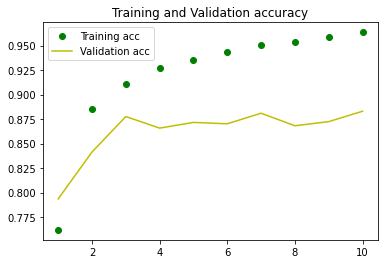

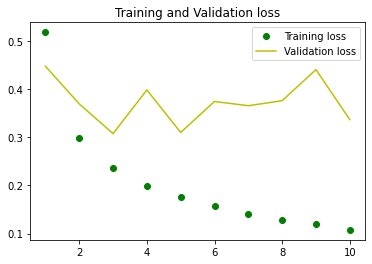

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'y', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()